In [1]:
import numpy as np 
import import_ipynb
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

importing Jupyter notebook from plotting_capabilities.ipynb
importing Jupyter notebook from extraction_preprocessing_visualisation.ipynb
 the problem has 734 number of cities.
 the problem has 16862 number of cities.
 the problem has 194 number of cities.
 the problem has 10639 number of cities.
--- 0.02450728416442871 seconds ---
--- 0.000885009765625 seconds ---
--- 0.0015718936920166016 seconds ---
--- 0.012358903884887695 seconds ---
importing Jupyter notebook from helper_functions_distance_calculator.ipynb
distance between a and b is [8. 1.]
1
4.0


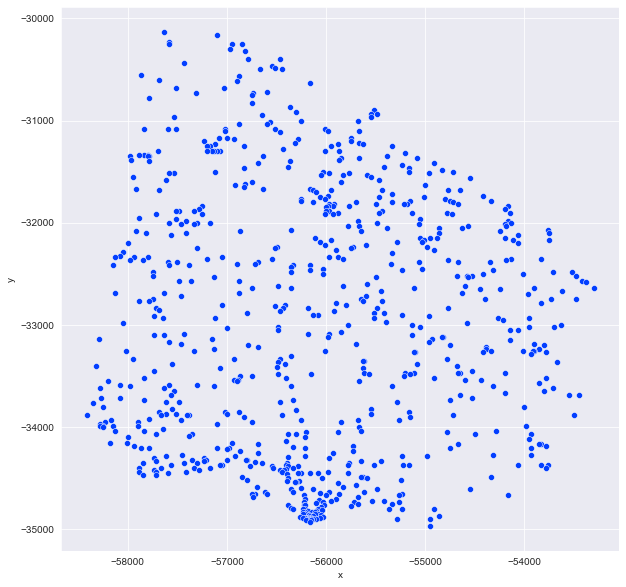

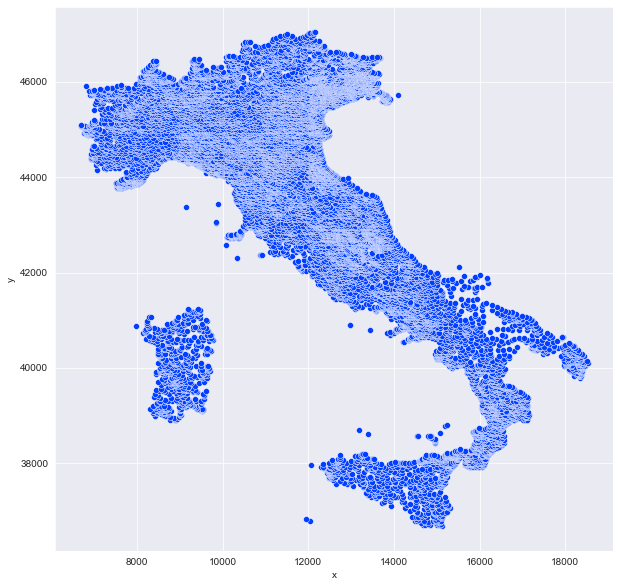

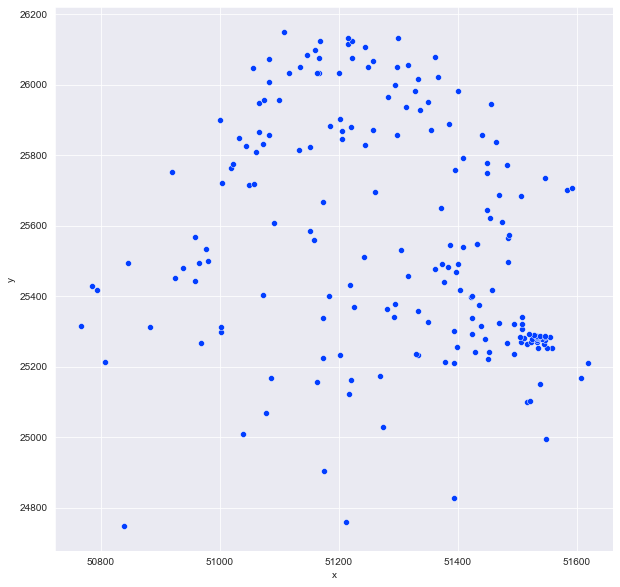

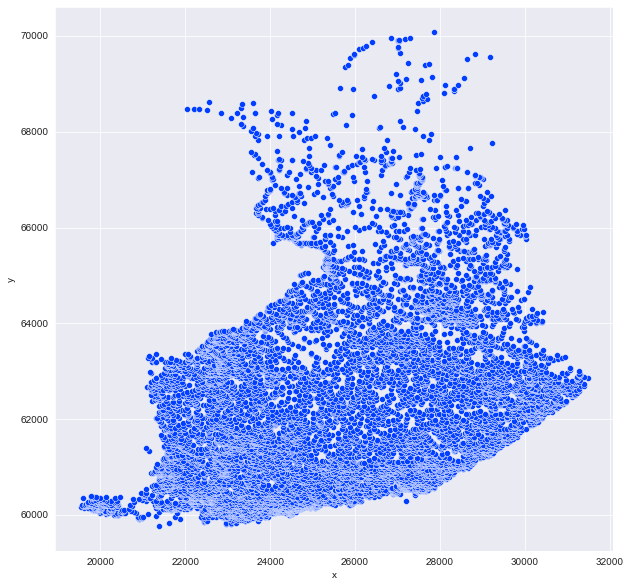

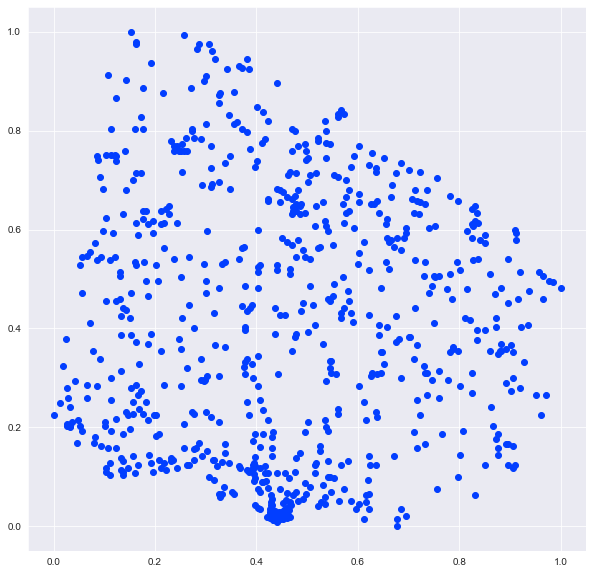

In [2]:
from plotting_capabilities import plot_network, plot_route
from extraction_preprocessing_visualisation import normalise_two, read_raw
from helper_functions_distance_calculator import choose_closest, calculate_dist, euclidean_distance

# network architecture : 

we have to first initialise the random weights as our neurons. it is favourable if we initialise our weights in the range (0,1) as the computtaion will be easier. 

In [3]:
def generate_random_network_weights(size):
    """
    parameters : 
    
    1) size = number of neurons in the network : dtype - int 
    
    """
    return np.random.rand(size, 2)

instead of generating a neuron grid, we will modify the neurons in a ring in which the neurons will be aware of only the neuron ahead of it and the neuron just behind it.  this elastic ring will expand and try to fit the cities

In [4]:
def get_gaussian_neighborhood(center, radius, domain):
    """
    returns the gaussian neighbourhood around the specified center 
    
    parameters : 
    
    1) center = the center of the gaussian 
    2) radius = the search distance for the gaussian 
    3) domain = a numpy array that defines the domain of the gaussian 
    """
    
    if radius < 1:
        radius = 1

    deltas = np.absolute(center - np.arange(domain))
    distances = np.minimum(deltas, domain - deltas)

    return np.exp(-(distances*distances) / (2*(radius*radius)))

In [5]:
def route_find(cities, network):
    """we have to compute the route generated by the network.
       to do this we will first select the winner neuron using 
       the choose closest function, then we will arrange this 
       in asceding order of index"""
    
    cities['w'] = cities[['x', 'y']].apply(lambda x : choose_closest(network, x), axis = 1, raw = True)
    
    # it is important that we set raw = true as on application of the function it will recieve ndarray inputs in contrast to series
    
    return cities.sort_values('w').index

In [6]:
def SELF_ORGANISING_MAP(dataset, epochs, learning_rate, decay_rate, threshold, file_path):
    """
    dataset = current pandas datafram we are working on (city num, x, y)
    
    epochs  = number of learning rounds for which the learning phase has to go 
    
    learning_rate = initial value of the learning rate 
    
    decay_rate = the value of the rate at which both the num neurons, learning rate decay
    
    threshold = a parameter that will tell use when to stop the learning 
    
    file_path = the file path of the folder in which the .png file has to be stored
    """
    cities = dataset.copy()
    
    # step 1 - normalise the coordinates using the normalisation function.
    
    cities = normalise_two(cities)
    
    # step 2 - decide the neuron population size - we have exactly n neurons at the start 
    
    if cities.shape[0]< 20000: 
        n = cities.shape[0] * np.random.randint(1,11)
    else: 
        n = cities.shape[0]
    
    # step 3 - initialise a network using the generate network function : 
    
    NN = generate_random_network_weights(n)
    
    print(f"initialised a network of {n} neurons. starting the learning process:")
    
    for epoch in range(epochs):
        if not epoch % 1000:
            print(f"Iteration {epoch}/{epochs}")
        
        
        # step 4 - choose a city randomly from the list of cities 
        city = cities.sample(1)[['x', 'y']].values 
        
        
        # step 5 - compute the winner neuron 
        winner = choose_closest(NN, city)
        
        
        # step 6 - define the neighbourhood 
        neighbourhood = get_gaussian_neighborhood(winner, n//10, NN.shape[0])
        
        
        # step 7 - update the weights according to the relation 
        NN += neighbourhood[:, np.newaxis] * learning_rate * (city - NN)
        
        # step 8 - to ensure the convergence, decay the learning rate 
        learning_rate = learning_rate * decay_rate
        n = n * decay_rate
        
        
        if not epoch % 1000  : 
            # here we will try to plot the state of the NN using the plotting capabilities.
            plot_network(cities, NN, name = file_path+('{:05d}.png'.format(epoch)))
        
        if (n < 1) : 
            # if we have exhausted our search space, no neuron remains, lambda ----> 0 we stop the search.
            print(f"radius has shrunk completely to just one neuron, finishing the learning phase at {epoch} epochs")
            break
            
        if (learning_rate < threshold): 
            print(f"learning rate has completely decayed, finishing the learning phase at {epoch} epochs")
            break
    
        
        
        
    plot_network(cities, NN, name = file_path+'final.png')
    optimal_route = route_find(cities, NN)
    plot_route(cities,optimal_route,file_path+'route.png')
        # return the optimal route 
    return optimal_route

# testing the function on uruguay dataset : 

In [9]:
route1 = SELF_ORGANISING_MAP(read_raw('/Users/adityagarg/Desktop/project.nosync/data/uy734.tsp'), 10000, 0.9999, 0.9997, 0.001, '/Users/adityagarg/Desktop/project.nosync/diagrams/uruguay-10000-0.9999/')

 the problem has 734 number of cities.
initialised a network of 5138 neurons. starting the learning process:
Iteration 0/10000
Iteration 1000/10000
Iteration 2000/10000
Iteration 3000/10000
Iteration 4000/10000
Iteration 5000/10000
Iteration 6000/10000
Iteration 7000/10000
Iteration 8000/10000
Iteration 9000/10000


In [10]:
route2 = SELF_ORGANISING_MAP(read_raw('/Users/adityagarg/Desktop/project.nosync/data/uy734.tsp'), 10000, 0.8000, 0.9997, 0.001, '/Users/adityagarg/Desktop/project.nosync/diagrams/uruguay-10000-0.8000/')

 the problem has 734 number of cities.
initialised a network of 3670 neurons. starting the learning process:
Iteration 0/10000
Iteration 1000/10000
Iteration 2000/10000
Iteration 3000/10000
Iteration 4000/10000
Iteration 5000/10000
Iteration 6000/10000
Iteration 7000/10000
Iteration 8000/10000
Iteration 9000/10000


In [12]:
route3 = SELF_ORGANISING_MAP(read_raw('/Users/adityagarg/Desktop/project.nosync/data/uy734.tsp'), 100000, 0.9998, 0.9997, 0.001, '/Users/adityagarg/Desktop/project.nosync/diagrams/uruguay-100000-0.9998/')

 the problem has 734 number of cities.
initialised a network of 5138 neurons. starting the learning process:
Iteration 0/100000
Iteration 1000/100000
Iteration 2000/100000
Iteration 3000/100000
Iteration 4000/100000
Iteration 5000/100000
Iteration 6000/100000
Iteration 7000/100000
Iteration 8000/100000
Iteration 9000/100000
Iteration 10000/100000
Iteration 11000/100000
Iteration 12000/100000
Iteration 13000/100000
Iteration 14000/100000
Iteration 15000/100000
Iteration 16000/100000
Iteration 17000/100000
Iteration 18000/100000
Iteration 19000/100000
Iteration 20000/100000
Iteration 21000/100000
Iteration 22000/100000
Iteration 23000/100000
learning rate has completely decayed, finishing the learning phase at 23021 epochs


In [13]:
route4 = SELF_ORGANISING_MAP(read_raw('/Users/adityagarg/Desktop/project.nosync/data/uy734.tsp'), 100000, 0.9997, 0.9997, 0.00001, '/Users/adityagarg/Desktop/project.nosync/diagrams/uruguay-100000-0.9997/')

 the problem has 734 number of cities.
initialised a network of 2936 neurons. starting the learning process:
Iteration 0/100000
Iteration 1000/100000
Iteration 2000/100000
Iteration 3000/100000
Iteration 4000/100000
Iteration 5000/100000
Iteration 6000/100000
Iteration 7000/100000
Iteration 8000/100000
Iteration 9000/100000
Iteration 10000/100000
Iteration 11000/100000
Iteration 12000/100000
Iteration 13000/100000
Iteration 14000/100000
Iteration 15000/100000
Iteration 16000/100000
Iteration 17000/100000
Iteration 18000/100000
Iteration 19000/100000
Iteration 20000/100000
Iteration 21000/100000
Iteration 22000/100000
Iteration 23000/100000
Iteration 24000/100000
Iteration 25000/100000
Iteration 26000/100000
radius has shrunk completely to just one neuron, finishing the learning phase at 26612 epochs


if you open the files you will see that these solutions are sub-optimal in nature, they have loops which shouldn't be there in reality 

# testing the network on qatar dataset :

In [15]:
route_qa = SELF_ORGANISING_MAP(read_raw('/Users/adityagarg/Desktop/project.nosync/data/qa194.tsp'), 100000, 0.99999, 0.99998, 0.0001, '/Users/adityagarg/Desktop/project.nosync/diagrams/qatar-100000-0.99999/')

 the problem has 194 number of cities.
initialised a network of 194 neurons. starting the learning process:
Iteration 0/100000
Iteration 1000/100000
Iteration 2000/100000
Iteration 3000/100000
Iteration 4000/100000
Iteration 5000/100000
Iteration 6000/100000
Iteration 7000/100000
Iteration 8000/100000
Iteration 9000/100000
Iteration 10000/100000
Iteration 11000/100000
Iteration 12000/100000
Iteration 13000/100000
Iteration 14000/100000
Iteration 15000/100000
Iteration 16000/100000
Iteration 17000/100000
Iteration 18000/100000
Iteration 19000/100000
Iteration 20000/100000
Iteration 21000/100000
Iteration 22000/100000
Iteration 23000/100000
Iteration 24000/100000
Iteration 25000/100000
Iteration 26000/100000
Iteration 27000/100000
Iteration 28000/100000
Iteration 29000/100000
Iteration 30000/100000
Iteration 31000/100000
Iteration 32000/100000
Iteration 33000/100000
Iteration 34000/100000
Iteration 35000/100000
Iteration 36000/100000
Iteration 37000/100000
Iteration 38000/100000
Iteratio

In [16]:
route_qa_1 = SELF_ORGANISING_MAP(read_raw('/Users/adityagarg/Desktop/project.nosync/data/qa194.tsp'), 100000, 0.9997, 0.99998, 0.001, '/Users/adityagarg/Desktop/project.nosync/diagrams/qatar-100000-0.9997/')

 the problem has 194 number of cities.
initialised a network of 776 neurons. starting the learning process:
Iteration 0/100000
Iteration 1000/100000
Iteration 2000/100000
Iteration 3000/100000
Iteration 4000/100000
Iteration 5000/100000
Iteration 6000/100000
Iteration 7000/100000
Iteration 8000/100000
Iteration 9000/100000
Iteration 10000/100000
Iteration 11000/100000
Iteration 12000/100000
Iteration 13000/100000
Iteration 14000/100000
Iteration 15000/100000
Iteration 16000/100000
Iteration 17000/100000
Iteration 18000/100000
Iteration 19000/100000
Iteration 20000/100000
Iteration 21000/100000
Iteration 22000/100000
Iteration 23000/100000
Iteration 24000/100000
Iteration 25000/100000
Iteration 26000/100000
Iteration 27000/100000
Iteration 28000/100000
Iteration 29000/100000
Iteration 30000/100000
Iteration 31000/100000
Iteration 32000/100000
Iteration 33000/100000
Iteration 34000/100000
Iteration 35000/100000
Iteration 36000/100000
Iteration 37000/100000
Iteration 38000/100000
Iteratio

In [17]:
route_qa_2 = SELF_ORGANISING_MAP(read_raw('/Users/adityagarg/Desktop/project.nosync/data/qa194.tsp'), 100000, 0.99999, 0.80000, 0.001, '/Users/adityagarg/Desktop/project.nosync/diagrams/qatar-100000-0.99997/')

 the problem has 194 number of cities.
initialised a network of 970 neurons. starting the learning process:
Iteration 0/100000
radius has shrunk completely to just one neuron, finishing the learning phase at 30 epochs


In [19]:
route_qa_3 = SELF_ORGANISING_MAP(read_raw('/Users/adityagarg/Desktop/project.nosync/data/qa194.tsp'), 100000, 0.99988, 0.95555, 0.00001, '/Users/adityagarg/Desktop/project.nosync/diagrams/qatar-100000-0.99988/')

 the problem has 194 number of cities.
initialised a network of 1940 neurons. starting the learning process:
Iteration 0/100000
radius has shrunk completely to just one neuron, finishing the learning phase at 166 epochs


we can use the in-built <b>Grid Search-CV</b> for tuning the hyper-parameters, like the learning rate and decay rate to find an optimal solution, we keep that as further work after this project, the person who is implementing this route can use "distance of the optimal solution" as the metric for defining performance and apply the grid search for paramter tuning 